In [1]:
# temp time check - remove before submission
import datetime
begin_time = datetime.datetime.now()

# Phase 2 Data Prep

## Environment setup

The code in section 1.1 is a repeat of the code in the first EDA notebook in order to bring in the data.

In [2]:
DATA_DIR = "../data/home-credit-default-risk"  # data folder will be present in the level as the code folder

In [3]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
import re
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # data will be stored in a dictionary

## Data Load

In [4]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 46.1 s, sys: 5.22 s, total: 51.3 s
Wall time: 1min 17s


In [5]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


In [6]:
appTrainDF = datasets["application_train"]
appTestDF = datasets["application_test"]
bureauDF = datasets["bureau"]
bureauBalDF = datasets["bureau_balance"]
creditCardBalDF = datasets["credit_card_balance"]
installmentPayDF = datasets["installments_payments"]
previousAppDF = datasets["previous_application"]
cashBalDF = datasets["POS_CASH_balance"]

In [7]:
# delete objects no longer needed for memory
import gc
gc.enable()
del datasets
gc.collect()

60

## Custom Transformers

### Feature Additions

In [8]:
# Create installment features
class InstallmentFeaturesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.l = []
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        # new feature creation from the Installment Payment file
        X['PAY_IS_LATE'] = X['DAYS_INSTALMENT'] - X['DAYS_ENTRY_PAYMENT']
        X['AMT_MISSED'] = X['AMT_INSTALMENT'] - X['AMT_PAYMENT']
        
        return X

In [9]:
# Create installment features
class CreditCardBalanceFeaturesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.l = []
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        # new feature creation from the Credit Card file
        X['DPD_MISSED'] = X['SK_DPD'] - X['SK_DPD_DEF']
        X['CREDIT_UTILIZED'] = X['AMT_CREDIT_LIMIT_ACTUAL'] - X['AMT_DRAWINGS_CURRENT']
        X['MIN_CREDIT_AMTMISS'] = X['AMT_INST_MIN_REGULARITY'] - X['AMT_PAYMENT_CURRENT']

        return X

In [10]:
# Create previous application features
class PreviousApplicationFeaturesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.l = []
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        # new feature in the Previous Application file
        X['INTEREST'] = X['CNT_PAYMENT'] * X['AMT_ANNUITY'] - X['AMT_CREDIT']
        X['INTEREST_PER_CREDIT'] = X['INTEREST'] / X['AMT_CREDIT']
        X['CREDIT_SUCCESS'] = X['AMT_APPLICATION'] - X['AMT_CREDIT']
        X['INTEREST_RT'] = 2 * 12 * X['INTEREST'] / (X['AMT_CREDIT'] * (X['CNT_PAYMENT'] + 1))
        
        return X

In [11]:
# Create application features
class ApplicationFeaturesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.l = []
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        # credit to income ratio
        X['CREDIT_INCOME_RATIO'] = X['AMT_CREDIT'] / X['AMT_INCOME_TOTAL']
        
        # annuity to income ratio
        X['ANNUITY_INCOME_RATIO'] = X['AMT_ANNUITY'] / X['AMT_INCOME_TOTAL']
        
        # length of the credit term
        X['CREDIT_LENGTH'] = X['AMT_ANNUITY'] / X['AMT_CREDIT']
        
        # what is income to age ratio
        X['INCOME_AGE_RATIO'] = X['AMT_INCOME_TOTAL'] / X['DAYS_BIRTH']
        
        # what is credit to age ratio
        X['CREDIT_AGE_RATIO'] = X['AMT_CREDIT'] / X['DAYS_BIRTH']
        
        # what percent of applicants life have they been working at recent company
        X['DAYS_EMPLOYED_PERCENT'] = X['DAYS_EMPLOYED'] / X['DAYS_BIRTH']
        
        # add liability feature code
        conditions_temp = [
            (X['FLAG_OWN_CAR'] == 'Y') & (X['FLAG_OWN_REALTY'] == 'Y'),
            (X['FLAG_OWN_CAR'] == 'N') & (X['FLAG_OWN_REALTY'] == 'Y'),
            (X['FLAG_OWN_CAR'] == 'Y') & (X['FLAG_OWN_REALTY'] == 'N'),
            (X['FLAG_OWN_CAR'] == 'N') & (X['FLAG_OWN_REALTY'] == 'N')]
        
        values_temp = ['0', '1', '2', '3']
        
        X['HAS_LIBAILITY'] = np.select(conditions_temp, values_temp)
        
        return X

### Feature Aggregation

In [12]:
# Create aggregate features
class FeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, grouping_feature = None, previousDFcolumns = None, prefix = ''):
        
        self.prefix = prefix
        self.previousDFcolumns = previousDFcolumns
        self.grouping_feature = grouping_feature
        self.numeric_stats = ["min", "max", "mean", "count", "sum"]
        self.categorical_stats = ["mean", "count", "sum"]
        self.agg_op_features = {}
        self.agg_features_names = [self.grouping_feature]
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        numeric_cols = list(X.columns[X.columns.isin(self.previousDFcolumns)])
        numeric_cols = [num for num in numeric_cols if num not in ['SK_ID_CURR','SK_ID_PREV','SK_ID_BUREAU']]
        categorical_cols = list(X.columns[~X.columns.isin(self.previousDFcolumns)])
        
        for f in numeric_cols:
            self.agg_op_features[f] = self.numeric_stats
            self.agg_features_names = self.agg_features_names + [self.prefix + "_" + f + "_" + s for s in self.numeric_stats]
            
        for f in categorical_cols:
            self.agg_op_features[f] = self.categorical_stats
            self.agg_features_names = self.agg_features_names + [self.prefix + "_" + f + "_" + s for s in self.categorical_stats]
        
        result = X.groupby(self.grouping_feature).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=[self.grouping_feature])
        result.columns = self.agg_features_names
        return result

### One Hot Encoder

In [13]:
# Create aggregate features (via pipeline)
class getDummies(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None): # no *args or **kargs
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):      
        result = pd.get_dummies(X, columns = self.columns)
        return result

### Missing Data Removal

In [14]:
# Remove missing columns
class MissingFeatureRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold = .6):
        self.threshold = threshold
        
    def fit(self, X, y=None):
        
        # get the percent of missingness in features
        percent = (X.isnull().sum()/X.isnull().count()).sort_values(ascending = False)
        
        # turn into a data frame
        missing_application_train_data  = pd.DataFrame(percent, columns=['Percent'])
        
        # get the columns with missingness exceeding the threshold
        self.columns_to_drop = list(missing_application_train_data.index[missing_application_train_data['Percent'] > self.threshold])
        
        return self
    
    def transform(self, X, y=None):
        
        # drop the columns with missingness over the threshold
        X = X.drop(columns = self.columns_to_drop, axis=1)
        
        return X

### Collinear Feature Removal

In [15]:
# Remove features with high collinearity
class CollinearFeatureRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold = .9):
        self.threshold = threshold
        
    def fit(self, X, y=None):
        
        # get the correlation matrix for the entire dataset after one hot encoding features
        correlation_matrix = X.sample(1000).corr().abs()
        
        # get only the lower portion of collinearity matrix
        lower = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(np.bool))
        
        # get the fields with correlation above threshold
        self.columns_to_drop = [index for index in lower.index if any(lower.loc[index] > self.threshold)]
        
        return self
    
    def transform(self, X, y=None):
        
        # drop the columns with collinearity over the threshold
        X = X.drop(columns = self.columns_to_drop, axis=1)
        
        return X

### Remove near zero variance

In [16]:
# Remove features with near zero variance
class NearZeroVarianceFeatureRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold = 0):
        self.threshold = threshold
        
    def fit(self, X, y=None):
        
        # get the fields with correlation above threshold
        self.columns_to_drop = [col for col in X.select_dtypes([np.number]).columns if np.nanvar(X[col]) <= self.threshold]
        
        return self
    
    def transform(self, X, y=None):
        
        # drop the columns with collinearity over the threshold
        X = X.drop(columns = self.columns_to_drop, axis=1)
        
        return X

# Overview

Throughout this document, the following occurs.
* The POS cash balance, installment payment, and credit card balance files get rolled up to the previous applications file joined by SK_ID_PREV. 
* The bureau balance file gets rolled up to the bureau file joined by SK_ID_BUREAU.
* The joined previous application data gets rolled up to the applications file
* The joined bureau data gets rolled up to the applications file

# Previous Applications Workflow

* Step 1: New features from the EDA are added to POS cash balance, installment payment, and credit card
* Step 2: OHE categorical features in POS cash balance, installment payment, and credit card balance data sets for categorical features
* Step 3: Aggregate numeric features by calculating min, max, mean, count, and sum for each feature. Aggregate the categorical features by taking the mean, count, and sum.
* Step 4: After aggregating, remove columns that are identical to other columns
* Step 5: Join the balance data sets to the previous application data separately. Only select the SK_ID_PREV and SK_ID_CURR from the previous application data set before joining to the balance data sets separately. This avoids the additional fields from the previous application data being stored multiple times when joined individually to the balance data set.
* Step 6: For joined previous application datasets: Aggregate numeric features by calculating min, max, mean, count, and sum for each min, max, mean, count, and sum feature. Aggregate the categorical features by taking the mean, count, and sum for each mean, count, and sum feature created previously.
* Step 6.1: After aggregating, remove columns that are more than 60% missing with other columns. This is a great way to reduce the feature space prior to joining to application data. Remove collinear features that are more than 90% correlated (VIF>10 which is standard threshold). This is another great way to reduce the feature space before storing the file.
* Step 7: For previous application data: Aggregate numeric features by calculating min, max, mean, count, and sum for each feature. Aggregate the categorical features by taking the mean, count, and sum.
* Step 7.1: After aggregating, remove features that are more than 60% missing with other features. This is a great way to reduce the feature space prior to joining to application data.
* Step 8: Join the aggregated previous application data to the application data by SK_ID_CURR

## POS Cash Balance

In [17]:
# set pos cash pipeline
pos_pipe = Pipeline([
    ('ohe', getDummies()),
    ('aggregater', FeaturesAggregater(grouping_feature = 'SK_ID_PREV', previousDFcolumns = cashBalDF.columns, prefix = 'POS')),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover())
])

In [18]:
# aggregate the data
aggcashBalDF = pos_pipe.fit_transform(cashBalDF)

In [19]:
# delete objects no longer needed for memory
import gc
gc.enable()
del cashBalDF
gc.collect()

20

## Credit Card Balance

In [20]:
# get column names
creditCardBalDF_columns = list(creditCardBalDF.columns)
creditCardBalDF_columns.extend(['DPD_MISSED', 'CREDIT_UTILIZED', 'MIN_CREDIT_AMTMISS'])

# set credit card pipeline
credit_card_pipe = Pipeline([
    ('credit_card_features', CreditCardBalanceFeaturesAdder()),
    ('ohe', getDummies()),
    ('aggregater', FeaturesAggregater(grouping_feature = 'SK_ID_PREV', previousDFcolumns = creditCardBalDF_columns, prefix = 'CC')),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover())
])

In [21]:
# aggregate the data
aggcreditCardBalDF = credit_card_pipe.fit_transform(creditCardBalDF)

In [22]:
# delete objects no longer needed for memory
import gc
gc.enable()
del creditCardBalDF
gc.collect()

20

## Installment Payments

In [23]:
# get column names
installmentPayDF_columns = list(installmentPayDF.columns)
installmentPayDF_columns.extend(['PAY_IS_LATE', 'AMT_MISSED'])

# set installment pipeline
installment_pipe = Pipeline([
    ('installment_features', InstallmentFeaturesAdder()),
    ('ohe', getDummies()),
    ('aggregater', FeaturesAggregater(grouping_feature = 'SK_ID_PREV', previousDFcolumns = installmentPayDF_columns, prefix = 'INST')),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover())
])

In [24]:
# aggregate the data
agginstallmentPayDF = installment_pipe.fit_transform(installmentPayDF)

In [25]:
# delete objects no longer needed for memory
import gc
gc.enable()
del installmentPayDF
gc.collect()

20

## Previous Applications

### Merge in aggregate data sets

In [26]:
prev_apps_all_df = previousAppDF.merge(aggcashBalDF, how='left', on='SK_ID_PREV')
prev_apps_all_df = prev_apps_all_df.merge(agginstallmentPayDF, how='left', on='SK_ID_PREV')
prev_apps_all_df = prev_apps_all_df.merge(aggcreditCardBalDF, how='left', on='SK_ID_PREV')

In [27]:
# this should be true
len(prev_apps_all_df) == len(previousAppDF)

True

In [28]:
# delete objects no longer needed for memory
import gc
gc.enable()
del previousAppDF
gc.collect()

40

### Aggregate

In [29]:
# get column names
prev_apps_all_df_columns = list(prev_apps_all_df.columns)
prev_apps_all_df_columns.extend(['INTEREST', 'INTEREST_PER_CREDIT', 'CREDIT_SUCCESS', 'INTEREST_RT'])

# set previous app pipeline
previous_app_pipe = Pipeline([
    ('previous_application_features', PreviousApplicationFeaturesAdder()),
    ('ohe', getDummies()),
    ('aggregater', FeaturesAggregater(grouping_feature = 'SK_ID_CURR', previousDFcolumns = prev_apps_all_df_columns, prefix = 'PREV')),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover())
])

In [30]:
# aggregate the data
aggprev_apps_all_df = previous_app_pipe.fit_transform(prev_apps_all_df)

In [31]:
# delete objects no longer needed for memory
import gc
gc.enable()
del prev_apps_all_df
gc.collect()

20

# Bureau Workflow

* Step 1: OHE categorical features in bureau balance data sets for categorical features
* Step 2: Aggregate numeric features by calculating min, max, mean, count, and sum for each feature. Aggregate the categorical features by taking the mean, count, and sum.
* Step 3: After aggregating, remove columns that are identical to other columns
* Step 4: Join the balance data sets to the bureau data separately. Only select the SK_ID_BUREAU and SK_ID_CURR from the previous application data set before joining to the balance data sets separately. This avoids the additional fields from the bureau data being stored multiple times when joined individually to the balance data set.
* Step 5: For joined bureau dataset: Aggregate numeric features by calculating min, max, mean, count, and sum for each min, max, mean, count, and sum feature. Aggregate the categorical features by taking the mean, count, and sum for each mean, count, and sum feature created previously.
* Step 5.1: After aggregating, remove columns that are more than 60% missing with other columns. This is a great way to reduce the feature space prior to joining to application data.
* Step 6: For previous application data: Aggregate numeric features by calculating min, max, mean, count, and sum for each feature. Aggregate the categorical features by taking the mean, count, and sum.
* Step 6.1: After aggregating, remove features that are more than 60% missing with other features. This is a great way to reduce the feature space prior to joining to application data. Remove collinear features that are more than 90% correlated (VIF>10 which is standard threshold). This is another great way to reduce the feature space before storing the file.
* Step 7: Join the aggregated bureau data to the application data by SK_ID_CURR

## Bureau Balance

In [32]:
# get column names
bureauBalDF_columns = list(bureauBalDF.columns)

# set bureau balance pipeline
bureau_balance_pipe = Pipeline([
    ('ohe', getDummies()),
    ('aggregater', FeaturesAggregater(grouping_feature = 'SK_ID_BUREAU', previousDFcolumns = bureauBalDF_columns, prefix = 'BURBAL')),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover())
])

In [33]:
# aggregate the data
aggbureauBalDF = bureau_balance_pipe.fit_transform(bureauBalDF)

In [34]:
# delete objects no longer needed for memory
import gc
gc.enable()
del bureauBalDF
gc.collect()

20

## Bureau

### Merge in aggregate data set

In [35]:
bureau_all_df = bureauDF.merge(aggbureauBalDF, how='left', on='SK_ID_BUREAU')

In [36]:
# this should be true
len(bureau_all_df) == len(bureauDF)

True

In [37]:
# delete objects no longer needed for memory
import gc
gc.enable()
del bureauDF
gc.collect()

60

### Aggregate

In [38]:
# get column names
bureau_all_df_columns = list(bureau_all_df.columns)

# set bureau pipeline
bureau_pipe = Pipeline([
    ('ohe', getDummies()),
    ('aggregater', FeaturesAggregater(grouping_feature = 'SK_ID_CURR', previousDFcolumns = bureau_all_df_columns, prefix = 'BUR')),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover())
])

In [39]:
# aggregate the data
aggbureau_all_df = bureau_pipe.fit_transform(bureau_all_df)

In [40]:
# delete objects no longer needed for memory
import gc
gc.enable()
del bureau_all_df
gc.collect()

20

# Applications Workflow

* Step 1: Merge previous aggregated application data and aggregated bureau data to application data by SK_ID_CURR
* Step 2: Add additional loan domain features
* Step 3: Remove features with high amounts of missingness above threshold
* Step 4: Remove collinear features above threshold
* Step 5: Remove zero variance features from final dataset

## Applications - Train

In [41]:
# merge the previous application and balance data to app data
appTrainDF = appTrainDF.merge(aggprev_apps_all_df, how='left', on='SK_ID_CURR')
appTrainDF = appTrainDF.merge(aggbureau_all_df, how='left', on='SK_ID_CURR')

In [42]:
# set application pipeline
app_pipe = Pipeline([
    ('app_features', ApplicationFeaturesAdder()),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover()),
    ('near zero variance remover', NearZeroVarianceFeatureRemover())
])

In [43]:
# transform the data
final_appTrainDF = app_pipe.fit_transform(appTrainDF)

In [60]:
# print out final shape of data
final_appTrainDF.shape

(307511, 625)

In [59]:
# write out the new application training data
final_appTrainDF.to_csv(DATA_DIR + '/train_clean.csv', index=False)

## Applications - Test

In [46]:
# merge the previous application and balance data to app data
appTestDF = appTestDF.merge(aggprev_apps_all_df, how='left', on='SK_ID_CURR')
appTestDF = appTestDF.merge(aggbureau_all_df, how='left', on='SK_ID_CURR')

In [47]:
# transform the data
final_appTestDF = app_pipe.transform(appTestDF)

In [48]:
# print out final shape of data
final_appTestDF.shape

(48744, 624)

In [49]:
# write out the new application test data
final_appTestDF.to_csv(DATA_DIR + '/test_clean.csv', index=False)

# Additional EDA - Combined Application Dataset

## Data Exploration

In [50]:
final_appTrainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 625 entries, SK_ID_CURR to HAS_LIBAILITY
dtypes: float64(570), int64(39), object(16)
memory usage: 1.4+ GB


### Unique Values in Columns with Object Type

In [51]:
final_appTrainDF.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
HAS_LIBAILITY                  4
dtype: int64

### Missing Data

In [52]:
percent = (final_appTrainDF.isnull().sum()/final_appTrainDF.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = final_appTrainDF.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data

,Percent,Train Missing Count
LANDAREA_AVG,59.38,182590
BASEMENTAREA_AVG,58.52,179943
EXT_SOURCE_1,56.38,173378
NONLIVINGAREA_AVG,55.18,169682
ELEVATORS_AVG,53.30,163891
...,...,...
ORGANIZATION_TYPE,0.00,0
LIVE_CITY_NOT_WORK_CITY,0.00,0
REG_CITY_NOT_WORK_CITY,0.00,0
REG_CITY_NOT_LIVE_CITY,0.00,0


<AxesSubplot:xlabel='Percent'>

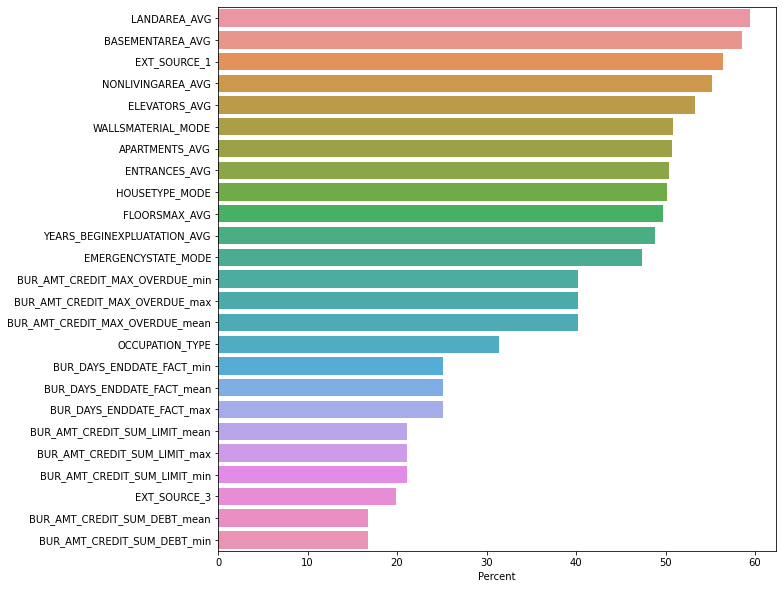

In [53]:
plt.figure(figsize=(10,10))
sns.barplot(y=missing_application_train_data.head(25).index, x=missing_application_train_data.head(25).Percent)

## Correlation

### Top 20 Features Against TARGET - Positive & Negative

In [54]:
correlation_all = final_appTrainDF.sample(10000).corr()['TARGET'].sort_values()

print('\nMost Negative Correlations with TARGET - Top 20:')
print(correlation_all.head(20))


Most Negative Correlations with TARGET - Top 20:
EXT_SOURCE_2                                        -0.175437
EXT_SOURCE_3                                        -0.174583
EXT_SOURCE_1                                        -0.162014
PREV_NAME_CONTRACT_STATUS_Approved_mean             -0.065277
PREV_INTEREST_RT_sum                                -0.056227
PREV_INST_PAY_IS_LATE_mean_sum                      -0.055566
PREV_DAYS_FIRST_DRAWING_mean                        -0.053224
PREV_HOUR_APPR_PROCESS_START_mean                   -0.050738
PREV_INTEREST_RT_mean                               -0.050604
PREV_INST_PAY_IS_LATE_mean_max                      -0.050366
PREV_INST_NUM_INSTALMENT_VERSION_max_sum            -0.050167
PREV_NAME_GOODS_CATEGORY_Consumer Electronics_sum   -0.046794
PREV_DAYS_FIRST_DRAWING_count                       -0.046691
REGION_POPULATION_RELATIVE                          -0.044875
PREV_POS_MONTHS_BALANCE_count_sum                   -0.044723
PREV_INST_PAY_IS_LAT

### Heat Map - Top Features Against TARGET

In [55]:
correlation_target = final_appTrainDF.sample(10000).corr()['TARGET'].sort_values()

top_correlation_features=[]
for i in correlation_target.head(6).keys().tolist():
    top_correlation_features.append(i)

for i in correlation_target.tail(6).keys().tolist():
    top_correlation_features.append(i)

<AxesSubplot:>

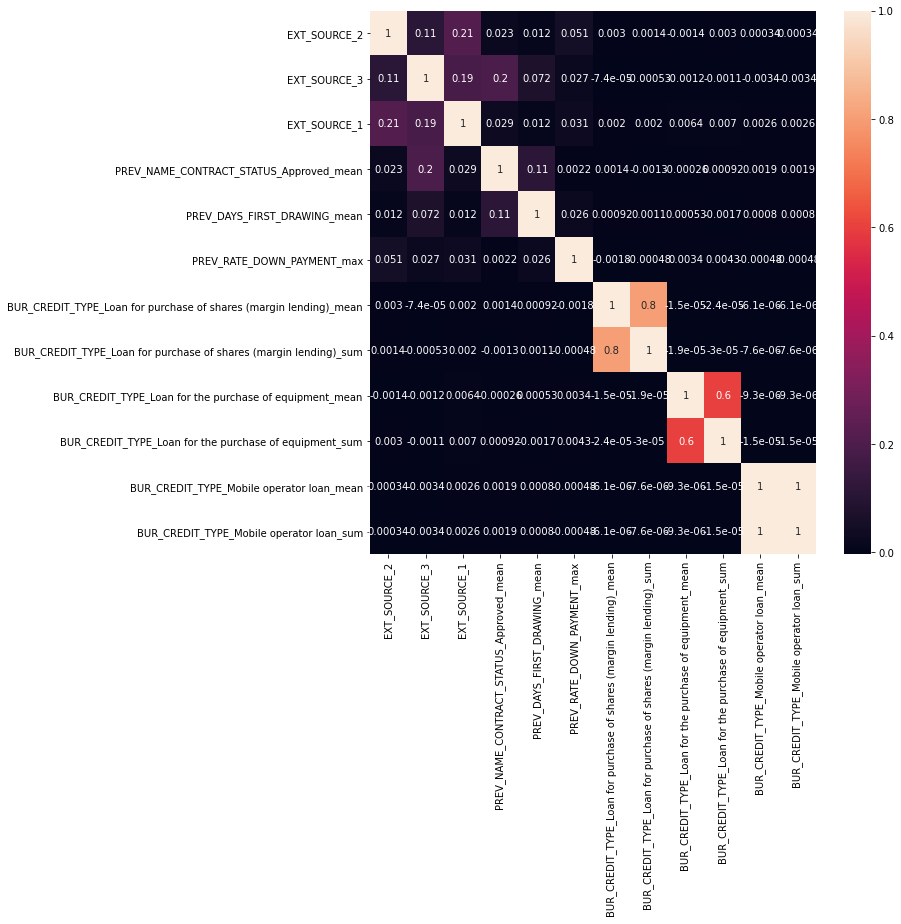

In [56]:
# Correlation Heat Map for Some Top Features
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(
    appTrainDF.loc[:, top_correlation_features].corr(),
    annot=True
)

In [58]:
# temp time check - remove before submission
print("Start time is ", begin_time)
print("End time is ", datetime.datetime.now())
print("Run time is ", datetime.datetime.now() - begin_time)

Start time is  2021-04-21 22:12:37.752119
End time is  2021-04-21 22:23:42.413902
Run time is  0:11:04.662572
